# Regression

### Problem - Predict a Crocodile's age

You are employed by the UACA (United Association of Crocodiles and Aligators) and have a new task for you. Some of your colleagues,
(data collection officers) travel around the world and track crocodiles in the wild. They have just gotten back from a recent trip and
have a problem. They would like to predict the age of new crocodiles they begin tracking.

### Features

The data contains 2 features:

- weights (in pounds), will be denoted as $x^{(i)}$
- age (in years), will be denoted $y^{(i)}$

For simplicity, let us assume that ages behave like real numbers.

Note: this data is completely made up for the purpose of this tutorial.





### Data Visualizaton

Before we start our problem it is helpful to a look at the data we have:

<AxesSubplot:xlabel='weight', ylabel='age'>

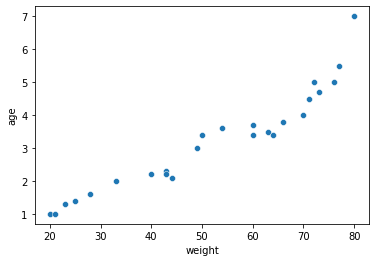

In [2]:
import pandas as pd
import seaborn as sns

# Import pseudo data set
df = pd.read_csv('../data/tabular/croc-age.csv')
training_data = pd.DataFrame({'weight': df.weight}).to_numpy()
labels =  pd.DataFrame({'age':df.age}).to_numpy() # age

#Visualize the data
sns.scatterplot(data=df, x="weight", y='age')

## Choosing a model

We can see that there might exist some linear relationship between our quantities. Thus let us use a linear model in the form of:
$ \^{y} = \theta x + \theta_0$ where  $\^{y}, x, \theta, \theta_0 \in R$.

### Evaluating our model

In terms of determining the correctness of our model and choosing an appropriate loss function, we will use least squares. That is for each data point we compare
our model $\^{y}^{(i)}$ with our observed value $y^{(i)}$ and square the result:

$
\[
\text{avg loss}  = \frac{1}{n} \sum_{i=0}^{n}
    ( y^{(i)} - \^{y}^{(i)})^2
\] \\
$


## Optimizing our model


### Visualizing loss

Now our goal is to find the `best' $\theta, \theta_0$. So we can visualize our loss function in 2d we will just start with searching for $\theta$.
Let's set up our objective function:

$J(\theta;\text{Data}) = \frac{1}{n} \sum_{i=0}^{n} ( y^{(i)} - (\theta * x^{(i)}))^2 $

And now let us visualize our loss function by running some values through $J$



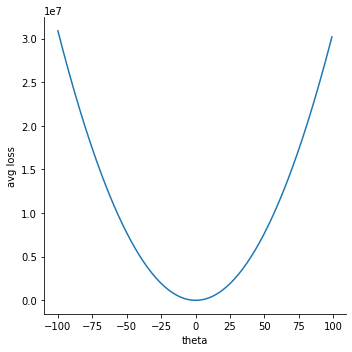

In [16]:
from regression import models, validate
import numpy as np

potential_theta_values =  [x / 1 for x in range(-100, 100)]
loss = []
for t in potential_theta_values:
        model = models.LinearRegression(theta=np.array([t]))
        loss.append(validate.avg_loss(model, training_data, labels))

plot = sns.relplot(x=potential_theta_values,y=loss, kind="line")
plot.set(xlabel ="theta", ylabel = "avg loss")


By visual inspection we can see that our best theta is somewhere around .06. Let's overlay a line on our scatter plot to see what this looks like.

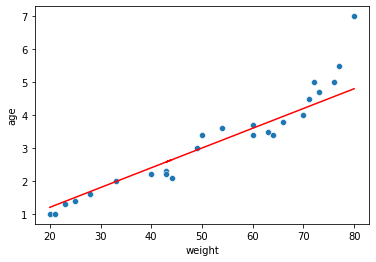

In [5]:
import numpy as np
from regression import models

#Visualize the data
plot = sns.scatterplot(data=df, x="weight", y='age')
model = models.LinearRegression(theta=np.array([.06]))

model_prediction = [model.predict(d) for d in training_data]
plot.plot(training_data, model_prediction, color='r')


### Gradient descent

Again by visual inspection we should note that our avg_loss function has a nice property,
it is convex. Loosely speaking this means that it has one global minimum. This is
extremely important to us, because we can use some mathematical techniques to find
its minimum.

To start, we will use an iterative version of an algorithm called gradient descent to solve this problem.
The key insight to gradient descent, is that we will use the derivative to help us reach our global minimum.

At a high level the algorithm looks like:
   - choose a random value of $\theta$
   - uses the derivative to update $\theta$ in an intelligent way
   - stops when we reach our minimum

#### The usefulness of derivatives

If we determine the derivative at a point
   - larger derivatives -> nudging theta yields high loss
   - smaller derivatives -> nudging theta yields low loss
   - the sign of the derivative also points in the direction of ascent / descent

Thus, the derivative gives us 2 key pieces of information, how much to move and what direction to move.

1. In terms of the former, if the derivative is larger, this means we are very far from our minimum.
So we should take a 'big step' aka update our $\theta$ by a large value. And if the derivative is smaller,
this means we are very close to the minimum, so we should take a `small step'.
So the distance to move = the derivative! More precisely we will define a
hyperparameter 'step_size', and the distance to move will actually be proportional to the derivative: distance = step_size * derivative.

2. In terms of the latter, we always want to move in the direction of the minimum. Thus as we increase $\theta$,
- And $J(\theta)$ is increasing, the derivative is positive, and we should 'move' in the opposite direction.
- And when $J(\theta)$ is decreasing, the derviative is negative, we want to keep moving in that direction.
In either cases negating the sign of derivative, allows us to 'point' $\theta$ in the correct direction!


#### Computing the derivative

To start, let us define our objective function as:

$
J(\theta; x^{(i)}, y^{(i)}) =
\[
\frac{1}{n} \sum_{i=0}^{n}
    ( y^{(i)} - \theta * x^{(i)})^2
\]
$

And we want: $ argmin_\theta \  J(\theta; x^{(i)}, y^{(i)})$

To solve this optimization problem we need to calculate is the derivative w.r.t $\theta$,

$
\dfrac{d}{d\theta}
\[
\frac{1}{n} \sum_{i=0}^{n}
    ( y^{(i)} - \theta * x^{(i)})^2
\]
=
\[
\frac{1}{n} \sum_{i=0}^{n}
\dfrac{d}{d\theta} ( y^{(i)} - \theta * x^{(i)})^2
\]
=
\[
\frac{1}{n} \sum_{i=0}^{n}
2( y^{(i)} - \theta * x^{(i)}) * x^{(i)}
\]
$




In [18]:
import numpy as np

from regression import train, models, validate

from importlib import reload

reload(validate)
reload(train)
reload(models)

d_theta = lambda x, y, theta: 2*(y - (theta-x)) * x
results = train.gradient_descent(
        training_data
        , labels
        , derivative=d_theta
        , step_size=.00001
        , maximum_num_steps=100
        , compute_avg_loss=True
)

gradient_model = results['model']
print(results['summary'])


#Visualize the data
# plot = sns.scatterplot(data=df, x="weight", y='age')
# model_prediction = [gradient_model.predict(d) for d in training_data]
# plot.plot(training_data, model_prediction, color='r')



Slope at (theta: -4, avg_loss: 50918.568) -> 174404.0
Slope at (theta: -2.25596, avg_loss: 16589.285068793535) -> 169852.05560000002
Slope at (theta: -0.9820695829999997, avg_loss: 3370.641776969584) -> 166527.20161162998
Slope at (theta: -0.04535407393458091, avg_loss: 36.708796559401016) -> 164082.37413296924
Slope at (theta: 0.6468684419388833, avg_loss: 1050.4037754378835) -> 162275.67336653953
Slope at (theta: 1.1603188147002, avg_loss: 3711.4389990240456) -> 160935.56789363248
Slope at (theta: 1.542226461166535, avg_loss: 6745.2757357102355) -> 159938.78893635535
Slope at (theta: 1.826883143624062, avg_loss: 9591.717099785534) -> 159195.83499514122
Slope at (theta: 2.0393839316699447, avg_loss: 12042.440452663608) -> 158641.20793834142
Slope at (theta: 2.198204269390199, avg_loss: 14055.950798857997) -> 158226.68685689155
Slope at (theta: 2.3170082808268218, avg_loss: 15663.855563710353) -> 157916.60838704198
Slope at (theta: 2.405936673319559, avg_loss: 16924.39181194138) -> 157